In [1]:
from scipy.fft import fft, fftfreq
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
def spectr(image):
    imageSpect = np.fft.fft2(image)
    return imageSpect 

In [3]:
def centr(image):
    imageSpect = np.fft.fft2(image)
    fshift = np.fft.fftshift(imageSpect)
    return fshift

In [4]:
def decentr(image):
    imageSpect = np.fft.fft2(image)
    fshift = np.fft.fftshift(imageSpect)
    ifshift= np.fft.ifftshift(fshift)
    return ifshift

In [5]:
def process(image):
    imageSpect = np.fft.fft2(image)
    fshift = np.fft.fftshift(imageSpect)
    ifshift= np.fft.ifftshift(fshift)
    iff = np.fft.ifft2(ifshift)
    proc = (np.abs(iff))
    return proc

<Figure size 432x288 with 0 Axes>

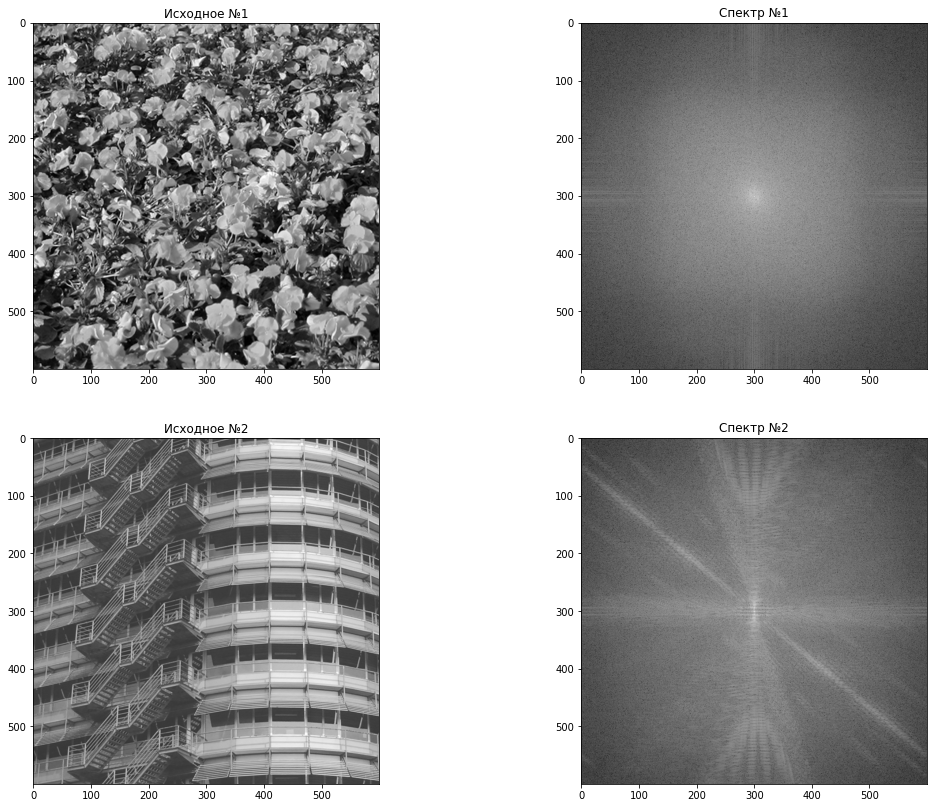

In [7]:
fig = plt.figure()

fig, ([ax1, ax2],[ax3, ax4] ) = plt.subplots(
    nrows=2, ncols=2,
    figsize=(18, 14)
)

ax1.set_title('Исходное №1')
ax2.set_title('Спектр №1')
ax3.set_title('Исходное №2')
ax4.set_title('Спектр №2')

image_1 = cv2.imread("./images/test1_5.tif") #Открываем изображение. 
img_1 = cv2.cvtColor(image_1,cv2.COLOR_BGR2GRAY)
image_2 = cv2.imread("./images/test2_5.tif") #Открываем изображение.
img_2 = cv2.cvtColor(image_2,cv2.COLOR_BGR2GRAY)
image_1_spec = centr(img_1)
image_2_spec = centr(img_2)
ax1.imshow(image_1, cmap='gray')
ax2.imshow(np.log(1+np.abs(image_1_spec)),cmap='gray')
ax3.imshow(image_2,cmap='gray')
ax4.imshow(np.log(1+np.abs(image_2_spec)),cmap='gray')

plt.show()

<Figure size 432x288 with 0 Axes>

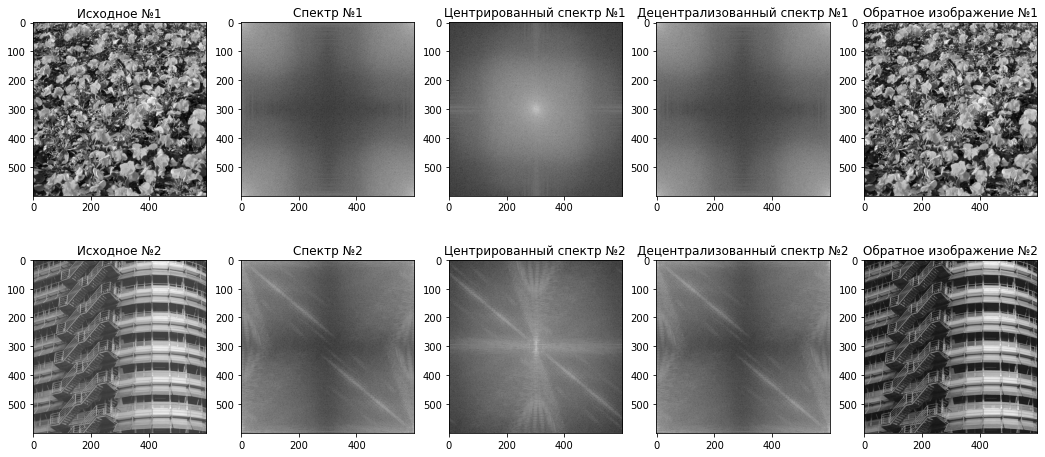

In [8]:
fig = plt.figure()

fig, ([ax1, ax2, ax3, ax4, ax5],[ax6, ax7, ax8, ax9, ax10] ) = plt.subplots(
    nrows=2, ncols=5,
    figsize=(18, 8)
)

ax1.set_title('Исходное №1')
ax2.set_title('Спектр №1')
ax3.set_title('Центрированный спектр №1')
ax4.set_title('Децентрализованный спектр №1')
ax5.set_title('Обратное изображение №1')
ax6.set_title('Исходное №2')
ax7.set_title('Спектр №2')
ax8.set_title('Центрированный спектр №2')
ax9.set_title('Децентрализованный спектр №2')
ax10.set_title('Обратное изображение №2')

image_1_spec = spectr(img_1)
image_1_centr = centr(img_1)
image_1_decentr = decentr(img_1)
image_1_proc = process(img_1)

image_2_spec = spectr(img_2)
image_2_centr = centr(img_2)
image_2_decentr = decentr(img_2)
image_2_proc = process(img_2)

ax1.imshow(image_1, cmap='gray')
ax2.imshow(np.log(1+np.abs(image_1_spec)),cmap='gray')
ax3.imshow(np.log(1+np.abs(image_1_centr)),cmap='gray')
ax4.imshow(np.log(1+np.abs(image_1_decentr)),cmap='gray')
ax5.imshow(image_1_proc,cmap='gray')

ax6.imshow(image_2, cmap='gray')
ax7.imshow(np.log(1+np.abs(image_2_spec)),cmap='gray')
ax8.imshow(np.log(1+np.abs(image_2_centr)),cmap='gray')
ax9.imshow(np.log(1+np.abs(image_2_decentr)),cmap='gray')
ax10.imshow(image_2_proc,cmap='gray')
plt.show()

In [9]:
def distance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def lp_filter(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base
    
def idealFilter(d, image):
    original = np.fft.fft2(image)
    center = np.fft.fftshift(original)
    LowPassCenter = center * lp_filter(d,image.shape)
    LowPass = np.fft.ifftshift(LowPassCenter)
    inverse_LowPass = np.fft.ifft2(LowPass)
    low = np.abs(inverse_LowPass)
    return low

<Figure size 432x288 with 0 Axes>

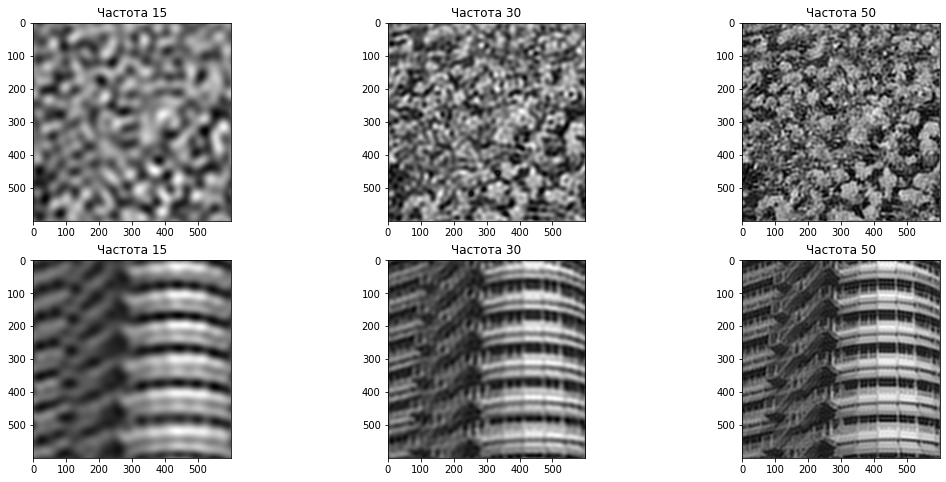

In [10]:
fig = plt.figure()

fig, ([ax1, ax2, ax3],[ax4, ax5, ax6] ) = plt.subplots(
    nrows=2, ncols=3,
    figsize=(18, 8)
)

ax1.set_title('Частота 15')
ax2.set_title('Частота 30')
ax3.set_title('Частота 50')
ax4.set_title('Частота 15')
ax5.set_title('Частота 30')
ax6.set_title('Частота 50')

image_1_spec_15 = idealFilter(15, img_1)
image_1_spec_30 = idealFilter(30, img_1)
image_1_spec_50 = idealFilter(50, img_1)


image_2_spec_15 = idealFilter(15, img_2)
image_2_spec_30 = idealFilter(30, img_2)
image_2_spec_50 = idealFilter(50, img_2)

ax1.imshow(image_1_spec_15, cmap='gray')
ax2.imshow(image_1_spec_30,cmap='gray')
ax3.imshow(image_1_spec_50,cmap='gray')

ax4.imshow(image_2_spec_15,cmap='gray')
ax5.imshow(image_2_spec_30,cmap='gray')
ax6.imshow(image_2_spec_50, cmap='gray')

plt.show()

In [11]:
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = math.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def GaussianFilter(d, image):
    original = np.fft.fft2(image)
    center = np.fft.fftshift(original)
    LowPassCenter = center * gaussianLP(d,image.shape)
    LowPass = np.fft.ifftshift(LowPassCenter)
    inverse_LowPass = np.fft.ifft2(LowPass)
    low = np.abs(inverse_LowPass)
    return low

<Figure size 432x288 with 0 Axes>

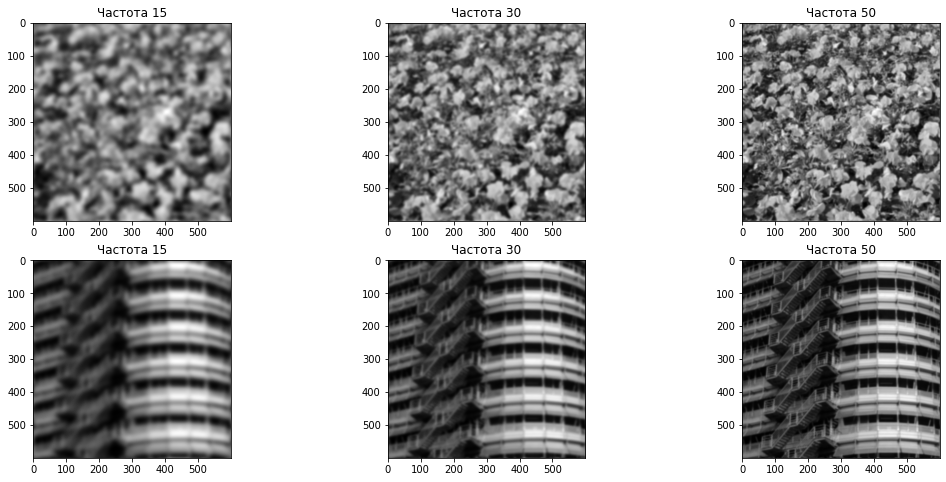

In [12]:
fig = plt.figure()

fig, ([ax1, ax2, ax3],[ax4, ax5, ax6] ) = plt.subplots(
    nrows=2, ncols=3,
    figsize=(18, 8)
)

ax1.set_title('Частота 15')
ax2.set_title('Частота 30')
ax3.set_title('Частота 50')
ax4.set_title('Частота 15')
ax5.set_title('Частота 30')
ax6.set_title('Частота 50')

image_1_G_15 = GaussianFilter(15, img_1)
image_1_G_30 = GaussianFilter(30, img_1)
image_1_G_50 = GaussianFilter(50, img_1)

image_2_G_15 = GaussianFilter(15, img_2)
image_2_G_30 = GaussianFilter(30, img_2)
image_2_G_50 = GaussianFilter(50, img_2)

ax1.imshow(image_1_G_15, cmap='gray')
ax2.imshow(image_1_G_30,cmap='gray')
ax3.imshow(image_1_G_50,cmap='gray')

ax4.imshow(image_2_G_15,cmap='gray')
ax5.imshow(image_2_G_30,cmap='gray')
ax6.imshow(image_2_G_50, cmap='gray')

plt.show()

In [13]:
def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def idealLHighFilter(d, image):
    original = np.fft.fft2(image)
    center = np.fft.fftshift(original)
    HighPassCenter = center * idealFilterHP(d,image.shape)
    HighPass = np.fft.ifftshift(HighPassCenter)
    inverse_HighPass = np.fft.ifft2(HighPass)
    high = np.abs(inverse_HighPass)
    return high
    

<Figure size 432x288 with 0 Axes>

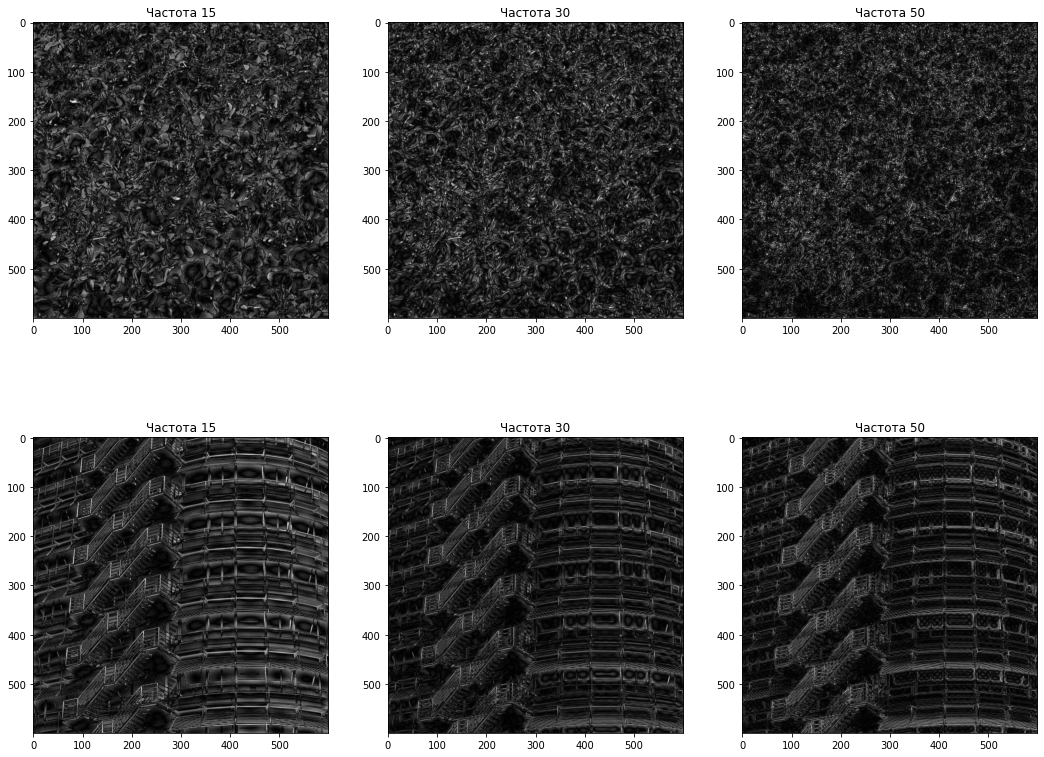

In [14]:
fig = plt.figure()

fig, ([ax1, ax2, ax3],[ax4, ax5, ax6] ) = plt.subplots(
    nrows=2, ncols=3,
    figsize=(18, 14)
)

ax1.set_title('Частота 15')
ax2.set_title('Частота 30')
ax3.set_title('Частота 50')
ax4.set_title('Частота 15')
ax5.set_title('Частота 30')
ax6.set_title('Частота 50')

image_1_H_15 = idealLHighFilter(15, img_1)
image_1_H_30 = idealLHighFilter(30, img_1)
image_1_H_50 = idealLHighFilter(50, img_1)

image_2_H_15 = idealLHighFilter(15, img_2)
image_2_H_30 = idealLHighFilter(30, img_2)
image_2_H_50 = idealLHighFilter(50, img_2)

ax1.imshow(image_1_H_15, cmap='gray')
ax2.imshow(image_1_H_30,cmap='gray')
ax3.imshow(image_1_H_50,cmap='gray')
ax4.imshow(image_2_H_15,cmap='gray')
ax5.imshow(image_2_H_30,cmap='gray')
ax6.imshow(image_2_H_50, cmap='gray')

plt.show()

In [15]:
def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - math.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base
    
def GaussianHighFilter(d, image):
    original = np.fft.fft2(image)
    center = np.fft.fftshift(original)
    HighPassCenter = center * gaussianHP(d,image.shape)
    HighPass = np.fft.ifftshift(HighPassCenter)
    inverse_HighPass = np.fft.ifft2(HighPass)
    high = np.abs(inverse_HighPass)
    return high

<Figure size 432x288 with 0 Axes>

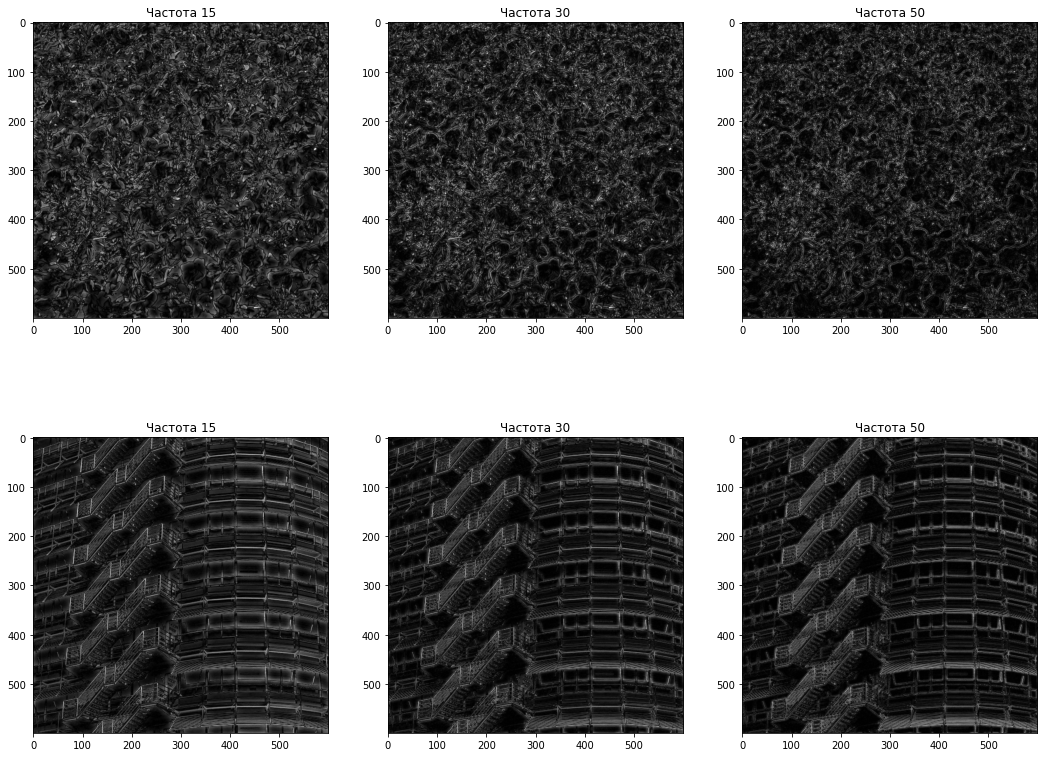

In [16]:
fig = plt.figure()

fig, ([ax1, ax2, ax3],[ax4, ax5, ax6] ) = plt.subplots(
    nrows=2, ncols=3,
    figsize=(18, 14)
)

ax1.set_title('Частота 15')
ax2.set_title('Частота 30')
ax3.set_title('Частота 50')
ax4.set_title('Частота 15')
ax5.set_title('Частота 30')
ax6.set_title('Частота 50')

image_1_GH_15 = GaussianHighFilter(15, img_1)
image_1_GH_30 = GaussianHighFilter(30, img_1)
image_1_GH_50 = GaussianHighFilter(50, img_1)

image_2_GH_15 = GaussianHighFilter(15, img_2)
image_2_GH_30 = GaussianHighFilter(30, img_2)
image_2_GH_50 = GaussianHighFilter(50, img_2)

ax1.imshow(image_1_GH_15, cmap='gray')
ax2.imshow(image_1_GH_30,cmap='gray')
ax3.imshow(image_1_GH_50,cmap='gray')

ax4.imshow(image_2_GH_15,cmap='gray')
ax5.imshow(image_2_GH_30,cmap='gray')
ax6.imshow(image_2_GH_50, cmap='gray')

plt.show()